# Tutorial 1: Tensor Manipulation

In [0]:
!rm -fr NamedTensor/; git clone -q https://github.com/harvardnlp/NamedTensor.git; cd NamedTensor; pip install -q .  

In [0]:
import numpy
from namedtensor import NamedTensor
from PIL.Image import fromarray
from IPython import get_ipython
ims = numpy.load('NamedTensor/examples/test_images.npy')

def numpy_to_png(a):
    assert 2 <= len(a.shape) <= 3, "Can't display {}-dimensional array of shape {}"\
        .format(len(a.shape), a.shape)
    return fromarray(numpy.array(numpy.clip(a, 0, 1) * 255, dtype='uint8'))._repr_png_()

get_ipython().display_formatter.formatters['image/png'].for_type(NamedTensor, lambda t: numpy_to_png(t.tensor))
get_ipython().display_formatter.formatters['text/plain'].for_type(NamedTensor, lambda *x: "");

# Examples

A set of examples based on EinOps showing how similar operations can be done with NamedTensor

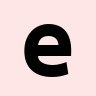

In [20]:
ims[0]
tensor = NamedTensor(ims[0], "h w c")
tensor

In [21]:
tensor.shape()

OrderedDict([('h', 96), ('w', 96), ('c', 3)])

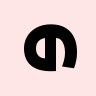

In [22]:
tensor.shift("w h c")

In [23]:
tensor = NamedTensor(ims[0], "h w c")
tensor.shift('h -> (height q)', height=8).shape()

OrderedDict([('height', 8), ('q', 12), ('w', 96), ('c', 3)])

In [24]:
tensor = NamedTensor(ims, 'b h w c')
tensor.shift('(b h) -> bh').shape()


 bh w c


OrderedDict([('bh', 576), ('w', 96), ('c', 3)])

 bw h c


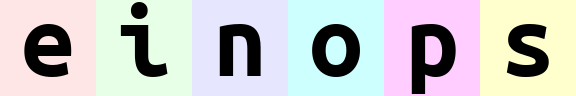

In [25]:
tensor.shift('(b w) -> bw', 'h bw c')


In [26]:
tensor.shift('(h b w c) -> full').shape()

 full


OrderedDict([('full', 165888)])

In [27]:
NamedTensor(ims, "b h w c").shift('b -> (b1 b2)', 'b1 b2 h w c', b1=2).shape()

OrderedDict([('b1', 2), ('b2', 3), ('h', 96), ('w', 96), ('c', 3)])

 b1 a w c
 d a c


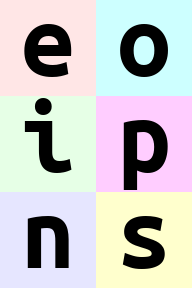

In [28]:
tensor.shift("b -> (b1 b2)", '(b2 h) -> a', '(b1 w) -> d', 'a d c', b1=2)

 b a w c
 d a c


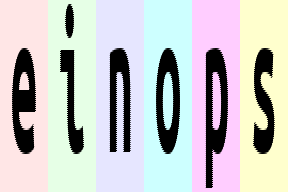

In [29]:
tensor.shift('w -> (w w2)', '(h w2) -> a', '(b w) -> d', 'a d c', w2=2)

 a h c


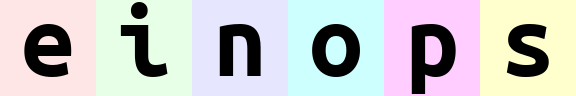

In [30]:
tensor.shift('(b w) -> a', 'h a c')

 a h c


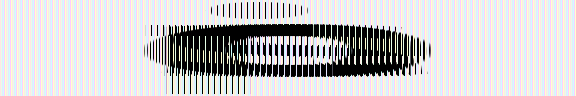

In [31]:
tensor.shift('(w b) -> a', 'h a c')

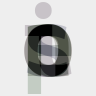

In [32]:
tensor = NamedTensor(ims, 'b h w c')
tensor.reduce('b', 'mean')

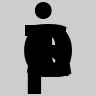

In [33]:
tensor.reduce('b c', 'min')


 h a c


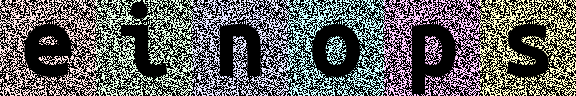

In [35]:
tensor = NamedTensor(ims, 'b h w c')
mask = NamedTensor(numpy.random.randint(0, 2, size=[96, 96]), 'h w')
tensor.binop(numpy.multiply, mask).shift('(b w) -> a', 'h a c')

 bw h c


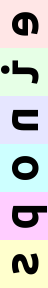

In [37]:
#reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2)
tensor = NamedTensor(ims, 'b h w c')
tensor.shift("h -> (h h2)", "w -> (w w2)", h2=2, w2=2).reduce("h2 w2", "mean").shift("(b w) -> bw")

 bw b2 h
 bw bh


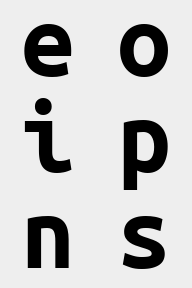

In [38]:
tensor = NamedTensor(ims, 'b h w c')
tensor.shift("b -> (b1 b2)", b1 = 2).reduce('c', "mean").shift("(b1 w) -> bw", "(b2 h) -> bh", 'bh bw')


 h b2 w c
 h w c


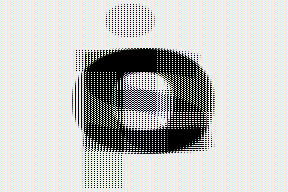

In [39]:
tensor.shift('b -> (b1 b2)', '(h b1) -> h', '(w b2) -> w', b1=2)